# BRAIN TUMOR CLASSIFICATION

### Importing required libraries

In [58]:
import tensorflow as tf
from tensorflow import keras 
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import models , layers 

In [59]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS = 3
input_shape = (BATCH_SIZE , IMAGE_SIZE , IMAGE_SIZE , CHANNELS)
n_classes = 4

### Setting dataset 

In [33]:
data = keras.preprocessing.image_dataset_from_directory(
   'data' ,
   batch_size = 32 ,
   shuffle = True ,
   color_mode="rgb"
)

Found 7023 files belonging to 4 classes.


In [34]:
classes = data.class_names

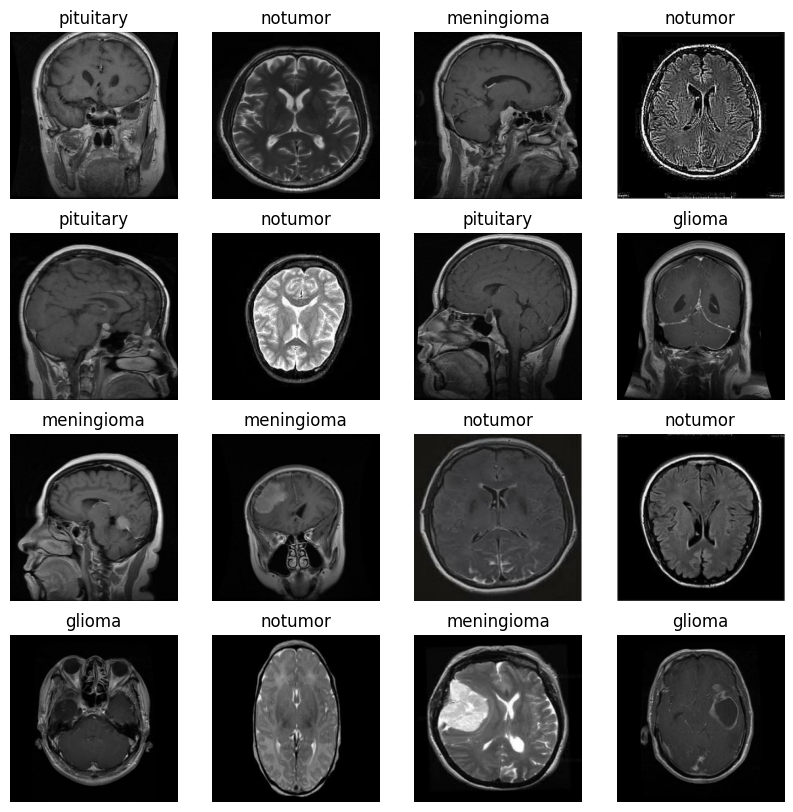

In [37]:
plt.figure(figsize=(10,10))
for image_batch , label_batch in data.take(1) : 
    for i in range(16):
        ax = plt.subplot(4 ,4 , i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.axis("off")
        plt.title(classes[label_batch[i]])


### Finding images to be scaled in 0 to 255.0

In [49]:
for image_batch , label_batch in data.take(1):
    for i in range(1):
        print(np.max(image_batch[i]) , np.min(image_batch[i]))

246.25 0.0


In [51]:
def get_dataset_partitions(ds , train_split = 0.8 , val_split = 0.1 , test_split = 0.1 , shuffle = True , shuffle_size = 10000):
    ds_size = len(ds)

    if shuffle : 
        ds = ds.shuffle(shuffle_size , seed = 97)

    train_size = int(ds_size * train_split)
    val_size = int(ds_size * val_split)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds , val_ds , test_ds

In [55]:
train , test , val = get_dataset_partitions(data)
train = train.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val = val.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test = test.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [ ]:
model = models.Sequential([
    #preprocessing
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE , IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255),

    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),

    #cnn
    layers.Conv2D(128 , kernel_size = (2,2) , activation = 'relu' , input_shape = input_shape),
    layers.MaxPooling2D(())

])